<a href="https://colab.research.google.com/github/KEHSANN/hosh_masnoi/blob/main/Q4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import r2_score
from keras.models import Sequential
from keras.layers import Dense

In [2]:
!gdown 1LjgD0GCoCoi_nIXp4AkRsyvd8CNd1hY1

Downloading...
From: https://drive.google.com/uc?id=1LjgD0GCoCoi_nIXp4AkRsyvd8CNd1hY1
To: /content/data.csv
100% 527k/527k [00:00<00:00, 120MB/s]


In [77]:
df = pd.read_csv('/content/data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [10]:
print(df.shape)
df.head

(4600, 18)


<bound method NDFrame.head of                      date         price  bedrooms  bathrooms  sqft_living  \
0     2014-05-02 00:00:00  3.130000e+05       3.0       1.50         1340   
1     2014-05-02 00:00:00  2.384000e+06       5.0       2.50         3650   
2     2014-05-02 00:00:00  3.420000e+05       3.0       2.00         1930   
3     2014-05-02 00:00:00  4.200000e+05       3.0       2.25         2000   
4     2014-05-02 00:00:00  5.500000e+05       4.0       2.50         1940   
...                   ...           ...       ...        ...          ...   
4595  2014-07-09 00:00:00  3.081667e+05       3.0       1.75         1510   
4596  2014-07-09 00:00:00  5.343333e+05       3.0       2.50         1460   
4597  2014-07-09 00:00:00  4.169042e+05       3.0       2.50         3010   
4598  2014-07-10 00:00:00  2.034000e+05       4.0       2.00         2090   
4599  2014-07-10 00:00:00  2.206000e+05       3.0       2.50         1490   

      sqft_lot  floors  waterfront  view  con

In [17]:
nan = df.isnull().sum()
nan
#df.dropna(inplace=True)

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

# PART2:corr_mat

<function matplotlib.pyplot.show(close=None, block=None)>

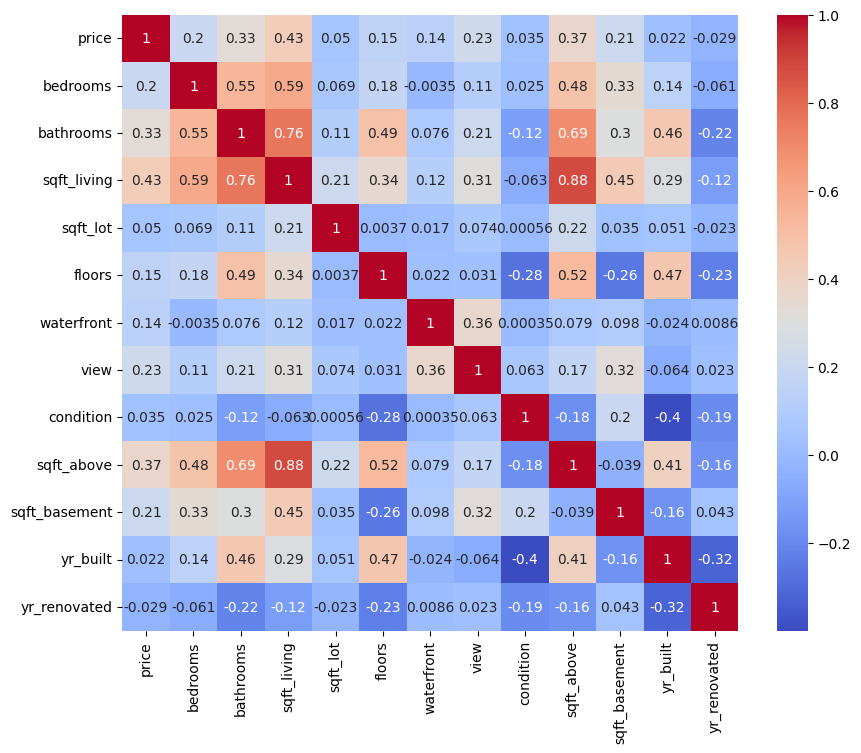

In [21]:
corr_mat = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_mat, annot=True, cmap="coolwarm", square=True)
plt.show

In [22]:
max_corr_feature_with_price = corr_mat['price'].nlargest(2).iloc[1:2].index[0]
max_corr_value_with_price = corr_mat['price'].nlargest(2).iloc[1:2].values[0]
print(f"max corr feature with price: {max_corr_feature_with_price} max_corr_value_with_price: {max_corr_value_with_price}")

max corr feature with price: sqft_living max_corr_value_with_price: 0.4304100254326265


# part3

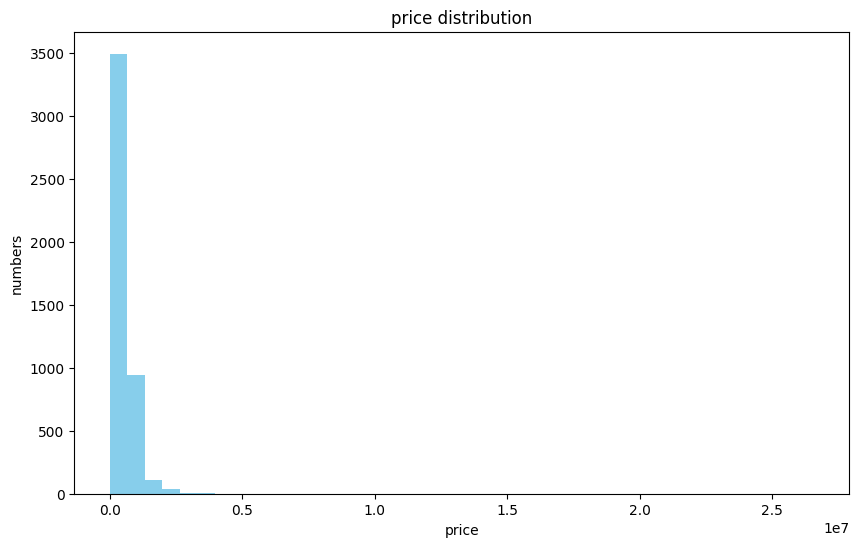

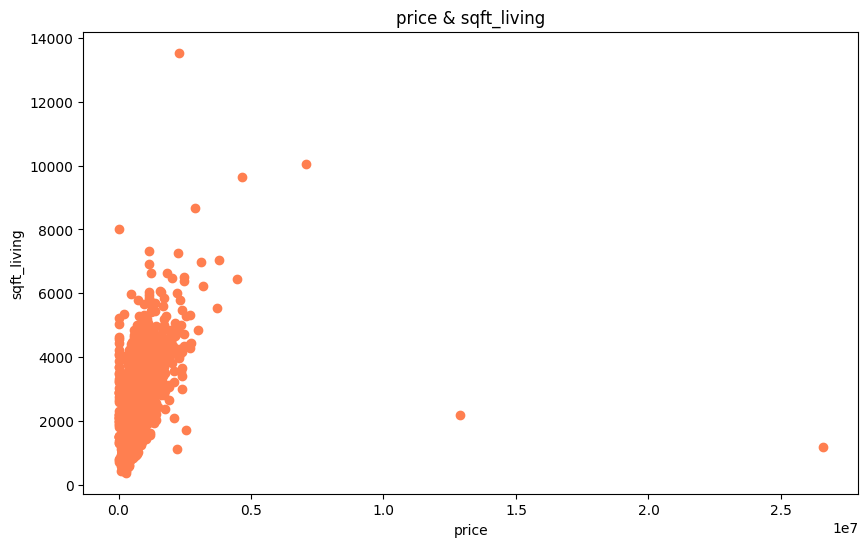

In [26]:
# part 3
plt.figure(figsize=(10, 6))
plt.hist(df['price'], bins=40, color='skyblue')
plt.title('price distribution')
plt.xlabel('price')
plt.ylabel('numbers')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(df['price'], df[max_corr_feature_with_price], color='coral')
plt.title(f'price & {max_corr_feature_with_price}')
plt.xlabel('price')
plt.ylabel(max_corr_feature_with_price)
plt.show()

# PART4

In [79]:
df[['year', 'month', 'day']] = df['date'].str.split('-', expand = True)
df = df.drop('date', axis = 1)
df = df.drop('day', axis = 1)
print(df)

             price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0     3.130000e+05       3.0       1.50         1340      7912     1.5   
1     2.384000e+06       5.0       2.50         3650      9050     2.0   
2     3.420000e+05       3.0       2.00         1930     11947     1.0   
3     4.200000e+05       3.0       2.25         2000      8030     1.0   
4     5.500000e+05       4.0       2.50         1940     10500     1.0   
...            ...       ...        ...          ...       ...     ...   
4595  3.081667e+05       3.0       1.75         1510      6360     1.0   
4596  5.343333e+05       3.0       2.50         1460      7573     2.0   
4597  4.169042e+05       3.0       2.50         3010      7014     2.0   
4598  2.034000e+05       4.0       2.00         2090      6630     1.0   
4599  2.206000e+05       3.0       2.50         1490      8102     2.0   

      waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
0              0     0          3    

# #part 5:


In [99]:
import numpy as np

from sklearn.model_selection import train_test_split
X = df.values[:, 1 : 13]
y = df.values[:, 0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

from sklearn.preprocessing import MinMaxScaler
scalerx_train = MinMaxScaler()
scalerx_test = MinMaxScaler()

scalerx_train.fit(X_train)
scalerx_test.fit(X_test)
# Normalize the training input data
X_train = scalerx_train.transform(X_train)

# Normalize the test input data
X_test = scalerx_test.transform(X_test)


print(X_test)

# Convert y_train and y_test type to DataFrame
print(y_train.shape)
y_train = y_train[:, None]
y_test = y_test[:, None]
print(y_train.shape)
scaler_2 = MinMaxScaler()

# Normalize outputs
y_train = scaler_2.fit_transform(y_train)
y_test = scaler_2.transform(y_test)
print(y_train)

[[0.57142857 0.28125    0.1033411  ... 0.         0.88596491 0.        ]
 [0.42857143 0.21875    0.08624709 ... 0.         0.69298246 0.        ]
 [0.57142857 0.40625    0.17948718 ... 0.20096852 0.86842105 0.        ]
 ...
 [0.42857143 0.1875     0.08624709 ... 0.         0.46491228 0.        ]
 [0.57142857 0.125      0.07226107 ... 0.         0.14035088 0.        ]
 [0.42857143 0.40625    0.10567211 ... 0.         0.70175439 0.        ]]
(3680,)
(3680, 1)
[[0.01453601]
 [0.03721219]
 [0.06845492]
 ...
 [0.03837507]
 [0.01783084]
 [0.05698116]]


In [100]:
model = Sequential()
model.add(Dense(40, activation= 'relu', input_shape = (X_train.shape[1],)))
model.add(Dense(20, activation= 'relu'))
model.add(Dense(10, activation= 'relu'))
model.add(Dense(1, activation= 'linear'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 40)                520       
                                                                 
 dense_18 (Dense)            (None, 20)                820       
                                                                 
 dense_19 (Dense)            (None, 10)                210       
                                                                 
 dense_20 (Dense)            (None, 1)                 11        
                                                                 
Total params: 1561 (6.10 KB)
Trainable params: 1561 (6.10 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [108]:
model.compile(optimizer='adam', loss='mse')
history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=10)

Epoch 1/100
295/295 [==============================] - 2s 4ms/step - loss: 2.7528e-04 - val_loss: 0.0015
Epoch 2/100
295/295 [==============================] - 1s 3ms/step - loss: 2.7946e-04 - val_loss: 0.0016
Epoch 3/100
295/295 [==============================] - 1s 2ms/step - loss: 2.6900e-04 - val_loss: 0.0016
Epoch 4/100
295/295 [==============================] - 1s 2ms/step - loss: 2.8295e-04 - val_loss: 0.0016
Epoch 5/100
295/295 [==============================] - 1s 2ms/step - loss: 2.7730e-04 - val_loss: 0.0015
Epoch 6/100
295/295 [==============================] - 1s 2ms/step - loss: 2.7294e-04 - val_loss: 0.0015
Epoch 7/100
295/295 [==============================] - 1s 2ms/step - loss: 2.6949e-04 - val_loss: 0.0016
Epoch 8/100
295/295 [==============================] - 1s 2ms/step - loss: 2.7552e-04 - val_loss: 0.0015
Epoch 9/100
295/295 [==============================] - 1s 2ms/step - loss: 2.6346e-04 - val_loss: 0.0016
Epoch 10/100
295/295 [==============================] -

In [109]:
loss = model.evaluate(X_test, y_test)

29/29 [==============================] - 0s 1ms/step - loss: 0.0052


In [110]:
y_pred_1 = model.predict(X_test)
rscore_1 = r2_score(y_test, y_pred_1)

rscore_1

29/29 [==============================] - 0s 1ms/step


0.06647210519616231

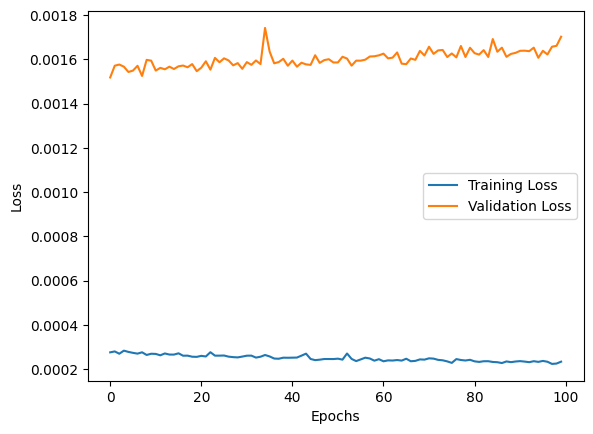

In [111]:
# Plot the training and validation loss
plt.plot(history.history['loss'], label='train')   # Training loss
plt.plot(history.history['val_loss'], label='val')  # Validation loss

plt.legend(['Training Loss', 'Validation Loss'])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()